# **Anticipating Hospital Admissions from the Emergency Department**

# **Pre-processing and Training Data Development**



## **Summary:** 


### **Feature Importance Analysis**

The feature importance analysis using Random Forest and XGBoost provides valuable insights into which features significantly contribute to predicting emergency department admissions. By combining the results from both methods, we can identify the most critical features.

#### Key Features:

1. **esi (Emergency Severity Index):** The ESI is the most important feature, with a combined importance score of 0.639930. It is a triage tool used to classify patients based on the severity of their condition and resource needs. Both XGBoost (0.519629) and Random Forest (0.120301) highlight its significance, emphasizing that patients with different ESI levels have varying probabilities of being admitted.

2. **age:** Age is another crucial feature with a combined importance score of 0.175883. It indicates that age plays a significant role in determining the likelihood of admission, with older patients generally having higher admission rates due to increased health risks.

3. **Triage Vital Signs (HR, SBP, DBP, Temp):** Triage vital signs, including heart rate (HR), systolic blood pressure (SBP), diastolic blood pressure (DBP), and temperature, are collectively important. Each vital sign has a combined importance score ranging from 0.112159 to 0.134236. These indicators are critical in assessing the patient's immediate health status and potential need for admission.

4. **n_admissions (Number of Previous Admissions):** The number of previous admissions is also a significant feature with a combined importance score of 0.107312. This suggests that patients with a history of frequent admissions are more likely to be admitted again, indicating a pattern of recurrent health issues.

5. **Triage Vital O2 Device:** The use of an oxygen device during triage has a combined importance score of 0.099329. This feature is indicative of patients requiring immediate respiratory support, which increases the likelihood of admission.

6. **Insurance Status:** Various insurance statuses, such as self-pay (0.098794), other types (0.071129), and Medicare (0.038573), also contribute to the prediction model. These features reflect the socio-economic aspects and access to healthcare resources, influencing admission rates.

7. **n_edvisits (Number of Previous ED Visits):** The number of previous emergency department visits has a combined importance score of 0.078466, indicating that patients with frequent ED visits are more likely to be admitted.

8. **n_surgeries (Number of Previous Surgeries):** This feature has a combined importance score of 0.068122, suggesting that patients with a history of surgeries are more likely to have conditions requiring hospital admission.

#### Insights and Implications:

The feature importance analysis underscores the multifaceted nature of predicting emergency department admissions. Medical factors such as the severity of the patient's condition (ESI), vital signs at triage, and the patient's medical history (previous admissions, surgeries) are paramount. Additionally, socio-economic factors, indicated by insurance status, also play a significant role.



### **Summary of the models and their performance**

The results from testing different models for anticipating admissions from the Emergency Department are summarized below. The models tested include
- **Logistic Regression (logreg)**,
- **XGBoost (XGB)**,
- **Naive Bayes (nb)**,
- **Random Forest (rf)**,
- **Ridge (rdg)**,
- **K-Nearest Neighbors (KNN)**,
- **Deep Neural Network (DNN)**, and
- **An ensemble model of Random Forest, XGBoost, and Deep Neural Network**.

The performance of each model is evaluated using the following metrics: 
- **accuracy score**,
- **precision score**,
- **recall score**,
- **F1 score**, and
- **ROC AUC score**.



| Model                 | Accuracy Score | Precision Score | Recall Score | F1 Score  | ROC AUC Score |
|-----------------------|----------------|-----------------|--------------|-----------|---------------|
| Logistic Regression   | 0.815383       | 0.671089        | 0.428822     | 0.523274  | 0.842728      |
| XGB                   | 0.819844       | 0.674034        | 0.459982     | 0.546807  | 0.853364      |
| Naive Bayes           | 0.784551       | 0.550113        | 0.483894     | 0.514883  | 0.797722      |
| Random Forest         | 0.815935       | 0.663608        | 0.448173     | 0.535018  | 0.842945      |
| Ridge                 | 0.810935       | 0.704475        | 0.344227     | 0.462475  | 0.649776      |
| KNN                   | 0.791513       | 0.577924        | 0.436188     | 0.497151  | 0.778599      |
| DNN                   | 0.819002       | 0.664881        | 0.471733     | 0.551896  | 0.852758      |
| Ensemble              | 0.820742       | 0.682139        | 0.451915     | 0.543658  | 0.854140      |

### Analysis

1. **Accuracy Score**:
   - **Best**: Ensemble (0.820742)
   - **Worst**: Naive Bayes (0.784551)
   - Accuracy indicates the proportion of total predictions that are correct. The Ensemble model has the highest accuracy, followed closely by XGB and DNN.

2. **Precision Score**:
   - **Best**: Ridge (0.704475)
   - **Worst**: Naive Bayes (0.550113)
   - Precision measures the proportion of true positives out of all positive predictions. Ridge model has the highest precision, meaning it has fewer false positives compared to others.

3. **Recall Score**:
   - **Best**: Naive Bayes (0.483894)
   - **Worst**: Ridge (0.344227)
   - Recall measures the proportion of true positives out of all actual positives. Naive Bayes performs best in this metric, indicating it identifies a higher proportion of actual admissions.

4. **F1 Score**:
   - **Best**: DNN (0.551896)
   - **Worst**: Ridge (0.462475)
   - F1 Score is the harmonic mean of precision and recall, providing a balance between the two. The DNN model has the highest F1 score, indicating a good balance between precision and recall.

5. **ROC AUC Score**:
   - **Best**: Ensemble (0.854140)
   - **Worst**: Ridge (0.649776)
   - ROC AUC measures the model's ability to distinguish between the positive and negative classes. Ensemble model has the highest ROC AUC, indicating the best overall performance in distinguishing between admitted and non-admitted patients.

### Conclusion

- The **Ensemble** model generally performs best across most metrics, including accuracy and ROC AUC, suggesting it is the most reliable for this classification task.
- **XGB** and **DNN** also show strong performance, with high accuracy, F1 scores, and ROC AUC, making them good alternatives.
- **Ridge** excels in precision but has the lowest recall and F1 score, indicating it may be too conservative in predicting admissions.
- **Naive Bayes** has the highest recall but suffers in other metrics, suggesting it is better at identifying admissions but at the cost of more false positives.

Overall, the Ensemble model offers the best trade-off between the various performance metrics, making it the most suitable choice for predicting patient admissions in this dataset.




## **Retriving the data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier





2024-12-30 14:01:10.195349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv("dataEDAed.csv")
df1 = df.drop(columns=["Unnamed: 0"])
df1.head()

,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,...,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries,age_bin
0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,Other,0,...,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0,21-40
1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,0,...,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0,61-80
2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,0,...,Discharge,134.0,78.0,16.0,0.0,97.8,1,0,2.0,61-80
3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,1,...,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0,81-150
4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,0,...,Admit,143.0,87.0,18.0,0.0,98.5,0,0,10.0,81-150


It seems that having insurance or not is important so let's make a dummy variable. 

## **Encoding Categorical Variables**

In our EDA, we come up with the conclusion that age and even insurance status are important features that affect disposition. We get dummies variables to count age and insurance status into account in our modeling. We also convert the boolean columns to integer columns. 

In [5]:
df1['insurance_status'] = df['insurance_status'].astype('category')
df2 = pd.get_dummies(df1, columns=['insurance_status', 'age_bin'])
boolean_columns = df2.select_dtypes(include=['bool']).columns
df2[boolean_columns] = df2[boolean_columns].astype(int)
df2.head()

,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,disposition,arrivalmode,...,insurance_status_Commercial,insurance_status_Medicaid,insurance_status_Medicare,insurance_status_Other,insurance_status_Self pay,age_bin_0-20,age_bin_21-40,age_bin_41-60,age_bin_61-80,age_bin_81-150
0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,0,Walk-in,...,0,0,0,1,0,0,1,0,0,0
1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Car,...,1,0,0,0,0,0,0,0,1,0
2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Walk-in,...,1,0,0,0,0,0,0,0,1,0
3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,1,Walk-in,...,0,0,1,0,0,0,0,0,0,1
4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,0,Walk-in,...,0,0,1,0,0,0,0,0,0,1


## **Importatn features**

In [125]:
numeric_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df2[numeric_columns]

### Train-Test-Split

In [9]:
X = df_numeric.drop(columns=['disposition'])
y = df_numeric['disposition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Stnadarizaiton

In [11]:
# Stnadarizaiton 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Feature Importance using XGBoost and RandomForesrClassifier

In [13]:
# Models
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()

# Fit models 
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


# Get feature importance
xgb_feature_importances = xgb_model.feature_importances_
xgb_features = X.columns
xgb_importance = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_feature_importances})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

rf_feature_importances = rf_model.feature_importances_
rf_features = X.columns
rf_importance = pd.DataFrame({'Feature': rf_features, 'Importance': rf_feature_importances})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

features = X.columns  
feature_importance = pd.DataFrame({'Feature': features, 'xgb_features': xgb_importance['Importance'], 'rf_features': rf_importance['Importance']})
feature_importance['importance'] = feature_importance['xgb_features'] + feature_importance['rf_features'] 
feature_importance = feature_importance.sort_values(by='importance', ascending = False)
feature_importance

,Feature,xgb_features,rf_features,importance
0,esi,0.519629,0.120301,0.639930
1,age,0.055945,0.119938,0.175883
2,triage_vital_hr,0.012773,0.121462,0.134236
3,triage_vital_sbp,0.006062,0.119291,0.125352
4,triage_vital_dbp,0.007618,0.112728,0.120346
7,triage_vital_temp,0.007761,0.104398,0.112159
9,n_admissions,0.053615,0.053697,0.107312
6,triage_vital_o2_device,0.085973,0.013357,0.099329
15,insurance_status_Self pay,0.092432,0.006362,0.098794
8,n_edvisits,0.021749,0.056716,0.078466


### Plotting feature importance

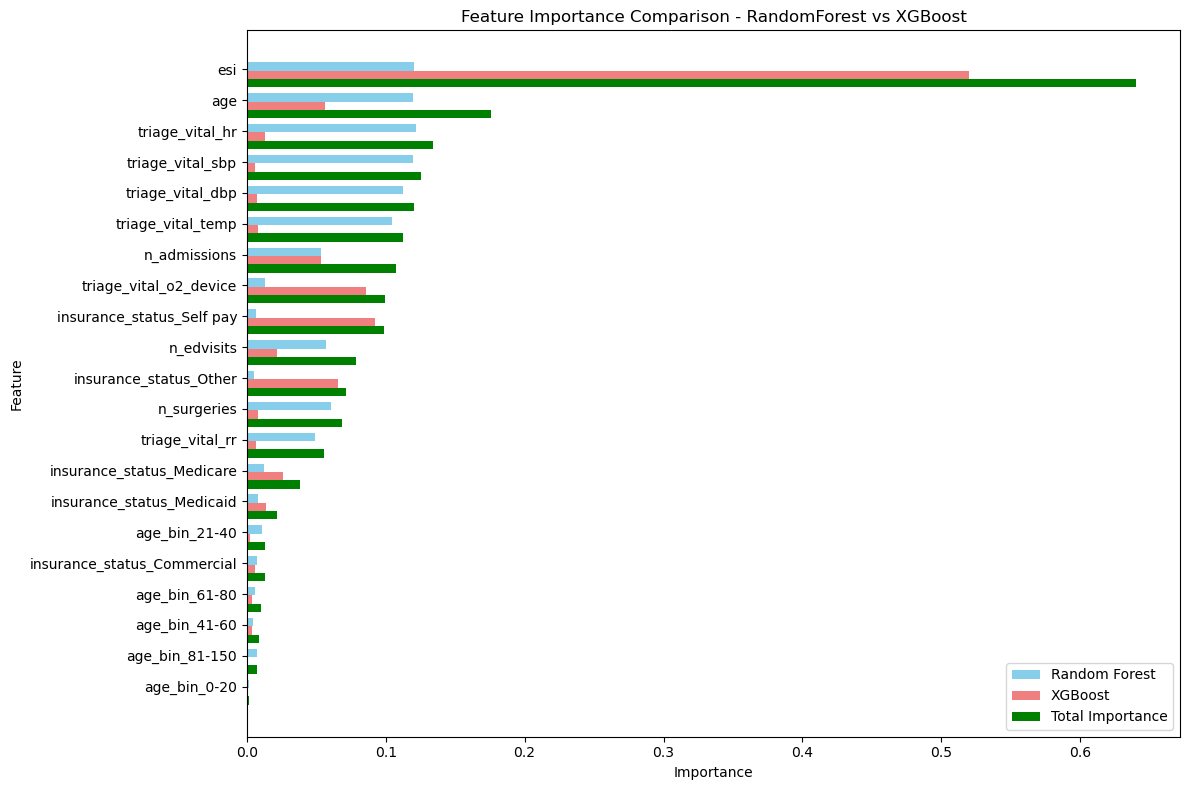

In [15]:
# Plot the feature importances side by side
plt.figure(figsize=(12, 8))

# Set the bar width and position for side-by-side bars
bar_width = 0.27  # Bar width for side-by-side bars
index = range(len(feature_importance))  # The index for each feature

# Plot Random Forest Feature Importances
plt.barh(index, feature_importance['rf_features'], height=bar_width, color='skyblue', label='Random Forest')

# Plot XGBoost Feature Importances (shifted by bar_width)
plt.barh([i + bar_width for i in index], feature_importance['xgb_features'], height=bar_width, color='lightcoral', label='XGBoost')

plt.barh([i + 2*bar_width for i in index], feature_importance['importance'], height=bar_width, color='green', label='Total Importance')

# Labeling
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison - RandomForest vs XGBoost')
plt.yticks([i + bar_width / 3 for i in index], feature_importance['Feature'])  # Center the feature labels between the bars
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### **PCA**

We perform PCA to capture 95% of the variance. Even though we do not use the PCA vectors, it would be worthwhile to know how many vectors can give us 95% of the variance. 

In [17]:
# Running PCA to capture 95% of the variance
pca = PCA(n_components=0.99)
pca_components = pca.fit_transform(X)


print(f'Number of components selected: {pca.n_components_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total variance explained: {sum(pca.explained_variance_ratio_)}')

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

Number of components selected: 6
Explained variance ratio: [0.42850104 0.2674107  0.18259198 0.05869283 0.05248045 0.00408914]
Total variance explained: 0.9937661413937853


# **Training and modeling**

We use the following model: 
- **Logistic Regression (logreg)**,
- **XGBoost (XGB)**,
- **Naive Bayes (nb)**,
- **Random Forest (rf)**,
- **Ridge (rdg)**,
- **K-Nearest Neighbors (KNN)**,
- **Deep Neural Network (DNN)**, and
- **An ensemble model of Random Forest, XGBoost, and Deep Neural Network**.

In [91]:
# Scores DataFrame 
score_df = pd.DataFrame(columns= ['Model', 'accuracy_score', 'percision_score', 'recall_score', 'f1_score', 'roc_auc_score'])

# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stnadarizaiton 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Logistic Regression ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg )
recall_logreg = recall_score(y_test, y_pred_logreg )
f1_logreg = f1_score(y_test, y_pred_logreg )
auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)

row_logreg_dic = {'Model':  'Logistic Regression', 'accuracy_score' : accuracy_logreg, 'percision_score' : precision_logreg, 'recall_score' : recall_logreg, 'f1_score': f1_logreg, 'roc_auc_score': auc_logreg}

score_df.loc[len(score_df)] = row_logreg_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728


In [93]:
# --- XGBoost Classifier ---
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb )
recall_xgb = recall_score(y_test, y_pred_xgb )
f1_xgb = f1_score(y_test, y_pred_xgb )
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

row_xgb_dic = {'Model':  'XGB', 'accuracy_score' : accuracy_xgb, 'percision_score' : precision_xgb, 'recall_score' : recall_xgb, 'f1_score': f1_xgb, 'roc_auc_score': auc_xgb}

score_df.loc[len(score_df)] = row_xgb_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364


In [95]:
# Naive Bayes 
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb )
recall_nb = recall_score(y_test, y_pred_nb )
f1_nb = f1_score(y_test, y_pred_nb )
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

row_nb_dic = {'Model':  'Naive Bayes', 'accuracy_score' : accuracy_nb, 'percision_score' : precision_nb, 'recall_score' : recall_nb, 'f1_score': f1_nb, 'roc_auc_score': auc_nb}

score_df.loc[len(score_df)] = row_nb_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722


In [97]:
# ---Random Forrest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf )
recall_rf = recall_score(y_test, y_pred_rf )
f1_rf = f1_score(y_test, y_pred_rf )
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

row_rf_dic = {'Model':  'Random Forrest', 'accuracy_score' : accuracy_rf, 'percision_score' : precision_rf, 'recall_score' : recall_rf, 'f1_score': f1_rf, 'roc_auc_score': auc_rf}

score_df.loc[len(score_df)] = row_rf_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722
3,Random Forrest,0.815935,0.663608,0.448173,0.535018,0.842945


In [99]:
# Ridge Classifier 

rdg = RidgeClassifier()
rdg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rdg = rdg.predict(X_test)

# Evaluate the model
accuracy_rdg = accuracy_score(y_test, y_pred_rdg)
precision_rdg = precision_score(y_test, y_pred_rdg)
recall_rdg = recall_score(y_test, y_pred_rdg)
f1_rdg = f1_score(y_test, y_pred_rdg)
auc_rdg = roc_auc_score(y_test, y_pred_rdg)

row_rdg_dic = {'Model':  'Ridge', 'accuracy_score' : accuracy_rdg, 'percision_score' : precision_rdg, 'recall_score' : recall_rdg, 'f1_score': f1_rdg, 'roc_auc_score': auc_rdg}

score_df.loc[len(score_df)] = row_rdg_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722
3,Random Forrest,0.815935,0.663608,0.448173,0.535018,0.842945
4,Ridge,0.810935,0.704475,0.344227,0.462475,0.649776


In [101]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)


row_knn_dic = {'Model':  'KNN', 'accuracy_score' : accuracy_knn, 'percision_score' : precision_knn, 'recall_score' : recall_knn, 'f1_score': f1_knn, 'roc_auc_score': auc_knn}

score_df.loc[len(score_df)] = row_knn_dic
score_df

,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722
3,Random Forrest,0.815935,0.663608,0.448173,0.535018,0.842945
4,Ridge,0.810935,0.704475,0.344227,0.462475,0.649776
5,KNN,0.791513,0.577924,0.436188,0.497151,0.778599


In [103]:
# --- Deep Neural Network (DNN) ---
from tensorflow.keras.metrics import AUC
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', AUC(name='auc')])

# Train the model
dnn_model.fit(X_train, y_train, epochs=2, batch_size=8)

# Make predictions
y_pred_prob_dnn = dnn_model.predict(X_test)[:, 0]
y_pred_dnn = (y_pred_prob_dnn >= 0.5).astype(int) 

accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn )
recall_dnn = recall_score(y_test, y_pred_dnn )
f1_dnn = f1_score(y_test, y_pred_dnn )
auc_dnn = roc_auc_score(y_test, y_pred_prob_dnn)

row_dnn_dic = {'Model':  'DNN', 'accuracy_score' : accuracy_dnn, 'percision_score' : precision_dnn, 'recall_score' : recall_dnn, 'f1_score': f1_dnn, 'roc_auc_score': auc_dnn}

score_df.loc[len(score_df)] = row_dnn_dic
score_df

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
36196/36196 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - Precision: 0.6534 - Recall: 0.4372 - accuracy: 0.8123 - auc: 0.8407 - loss: 0.3979
Epoch 2/2
36196/36196 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - Precision: 0.6721 - Recall: 0.4457 - accuracy: 0.8175 - auc: 0.8510 - loss: 0.3878
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step


,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722
3,Random Forrest,0.815935,0.663608,0.448173,0.535018,0.842945
4,Ridge,0.810935,0.704475,0.344227,0.462475,0.649776
5,KNN,0.791513,0.577924,0.436188,0.497151,0.778599
6,DNN,0.819002,0.664881,0.471733,0.551896,0.852758


In [105]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin

# Define a custom wrapper for the Deep Neural Network to use in the ensemble
class DNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = Sequential()
        self.model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))  # Binary classification

    def fit(self, X, y):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=2, batch_size=8, verbose=0)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()  # Predict class labels

    def predict_proba(self, X):
        # Return probabilities for the positive class (class 1)
        prob = self.model.predict(X)
        return np.concatenate([1 - prob, prob], axis=1)  # Probabilities for both classes



# Create the ensemble (Voting Classifier)
dnn_model = DNNWrapper()

voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('dnn', dnn_model),
], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)


y_pred_prob_ens = voting_clf.predict_proba(X_test)[:, 1]
y_pred_ens = voting_clf.predict(X_test)

accuracy_ens = accuracy_score(y_test, y_pred_ens)
auc_ens = roc_auc_score(y_test, y_pred_prob_ens)
precision_ens = precision_score(y_test, y_pred_ens)
recall_ens = recall_score(y_test, y_pred_ens)
f1_ens = f1_score(y_test, y_pred_ens)

row_ens_dic = {'Model':  'Ensemble', 'accuracy_score' : accuracy_ens, 'percision_score' : precision_ens, 'recall_score' : recall_ens, 'f1_score': f1_ens, 'roc_auc_score': auc_ens}

score_df.loc[len(score_df)] = row_ens_dic
score_df

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2263/2263 ━━━━━━━━━━━━━━━━━━━━ 2s 683us/step
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step


,Model,accuracy_score,percision_score,recall_score,f1_score,roc_auc_score
0,Logistic Regression,0.815383,0.671089,0.428822,0.523274,0.842728
1,XGB,0.819844,0.674034,0.459982,0.546807,0.853364
2,Naive Bayes,0.784551,0.550113,0.483894,0.514883,0.797722
3,Random Forrest,0.815935,0.663608,0.448173,0.535018,0.842945
4,Ridge,0.810935,0.704475,0.344227,0.462475,0.649776
5,KNN,0.791513,0.577924,0.436188,0.497151,0.778599
6,DNN,0.819002,0.664881,0.471733,0.551896,0.852758
7,Ensemble,0.820742,0.682139,0.451915,0.543658,0.854140


### Visualization

To better understand and compare the performance of the models, we will create the following plots:
 Bar plots for each metric (accuracy, precision, recall, F1 score, ROC AUC score).

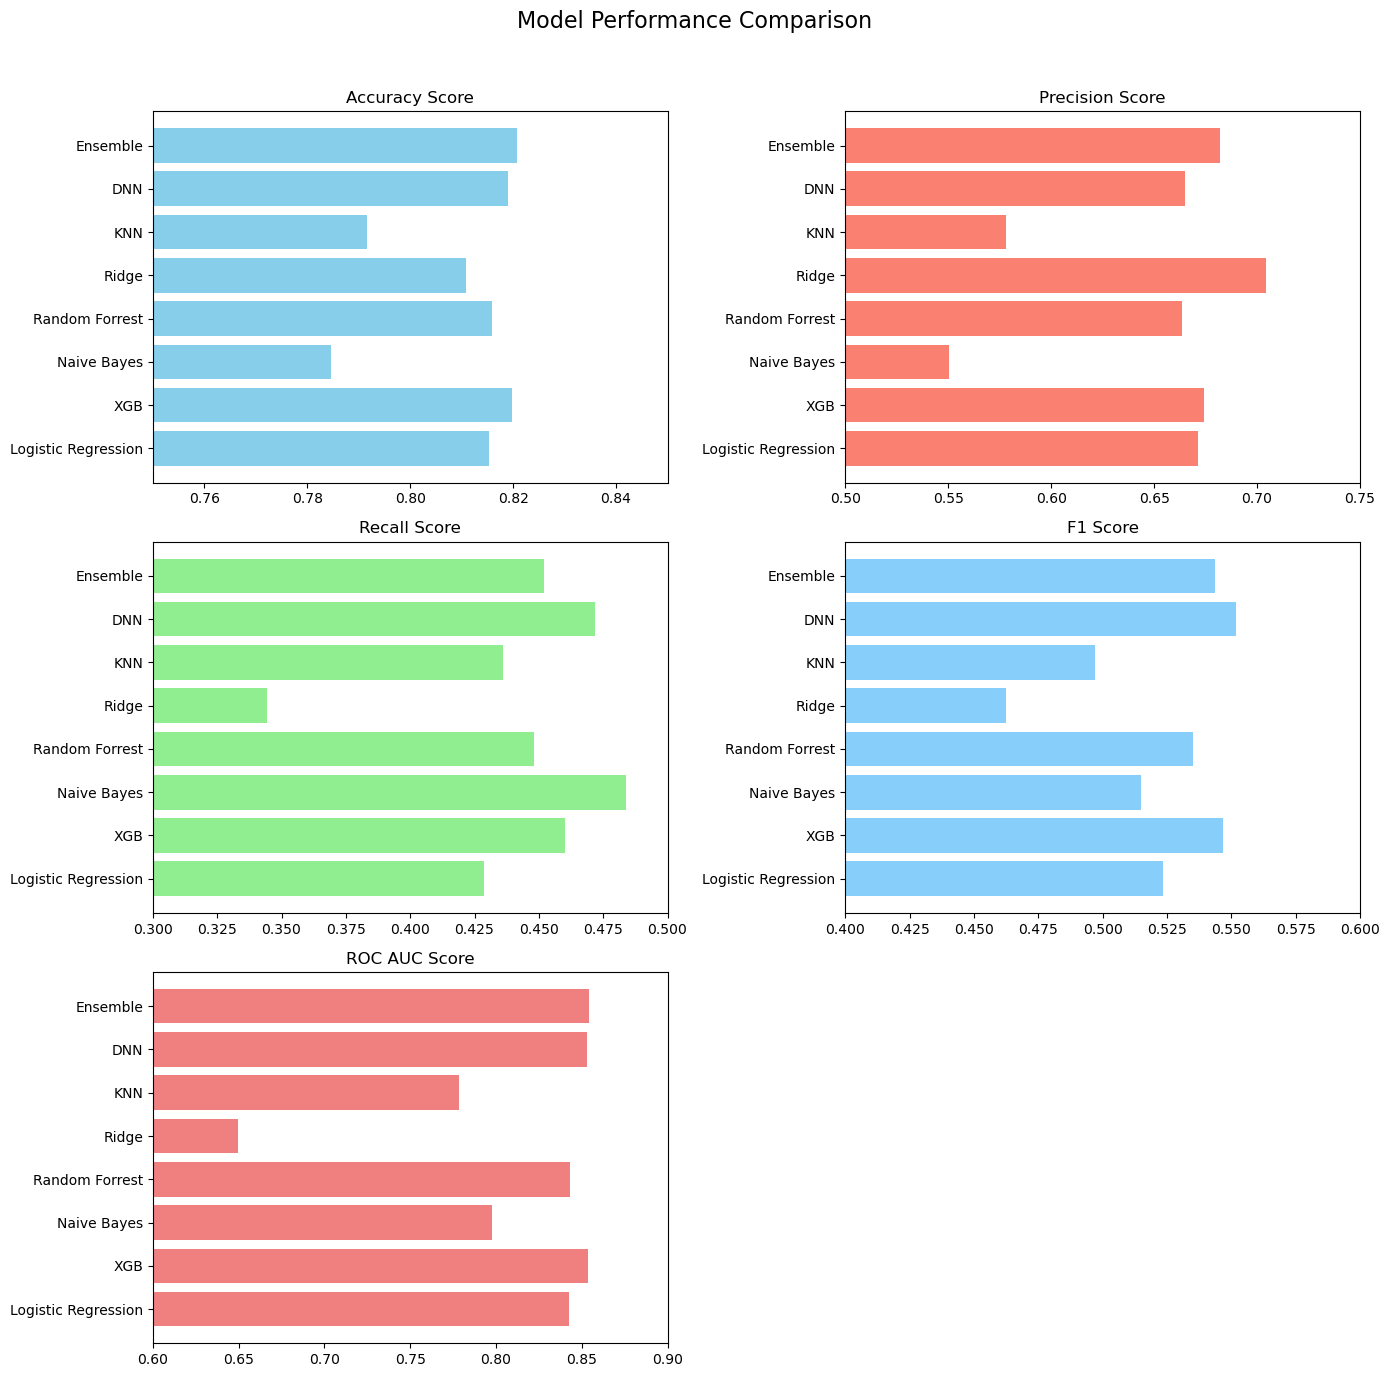

In [113]:
import matplotlib.pyplot as plt

# Models and their respective performance metrics
models = score_df['Model']
accuracy = score_df['accuracy_score']
precision = score_df['percision_score']
recall = score_df['recall_score']
f1 = score_df['f1_score']
roc_auc = score_df['roc_auc_score']

# Create subplots for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot Accuracy
axes[0, 0].barh(models, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy Score')
axes[0, 0].set_xlim([0.75, 0.85])

# Plot Precision
axes[0, 1].barh(models, precision, color='salmon')
axes[0, 1].set_title('Precision Score')
axes[0, 1].set_xlim([0.5, 0.75])

# Plot Recall
axes[1, 0].barh(models, recall, color='lightgreen')
axes[1, 0].set_title('Recall Score')
axes[1, 0].set_xlim([0.3, 0.5])

# Plot F1 Score
axes[1, 1].barh(models, f1, color='lightskyblue')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_xlim([0.4, 0.6])

# Plot ROC AUC Score
axes[2, 0].barh(models, roc_auc, color='lightcoral')
axes[2, 0].set_title('ROC AUC Score')
axes[2, 0].set_xlim([0.6, 0.9])

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
